In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from myutils import plot_utils as pu
from astropy.time import Time, TimeDelta


## Load metrics

In [7]:
metrics_dic = {}

# Using all available data
metrics_dic["FINK"] = pd.read_csv('../dump/data_fink/metrics.csv')
metrics_dic["ZTF"] = pd.read_csv('../dump/data_ZTF/metrics.csv')
metrics_dic["TNS"] = pd.read_csv('../dump/data_allTNS/metrics.csv')

# Using only those with probability 0.4<p<0.6
metrics_dic["FINK_probacut"] = pd.read_csv('../dump/data_fink_proba/metrics.csv')
metrics_dic["ZTF_probacut"] = pd.read_csv('../dump/data_ZTF_proba/metrics.csv')
metrics_dic["TNS_probacut"] = pd.read_csv('../dump/data_allTNS_proba/metrics.csv')

In [8]:
# date reformatting to align with all dates in our metrics
all_dates = np.concat([metrics_dic[k]['date'].astype(int).values for k in metrics_dic.keys()])
all_dates = np.unique(all_dates)

# reformatting
# lets put the date_plot in the same baseline using the combining dataset
to_merge = pd.DataFrame({'date':all_dates, 'date_plot_universal':np.arange(0,len(all_dates))})

for k in metrics_dic.keys():
    metrics_dic[k]['date'] = metrics_dic[k]['date'].astype(int)
    metrics_dic[k] = pd.merge(metrics_dic[k], to_merge, on='date',how='left')

## Plots

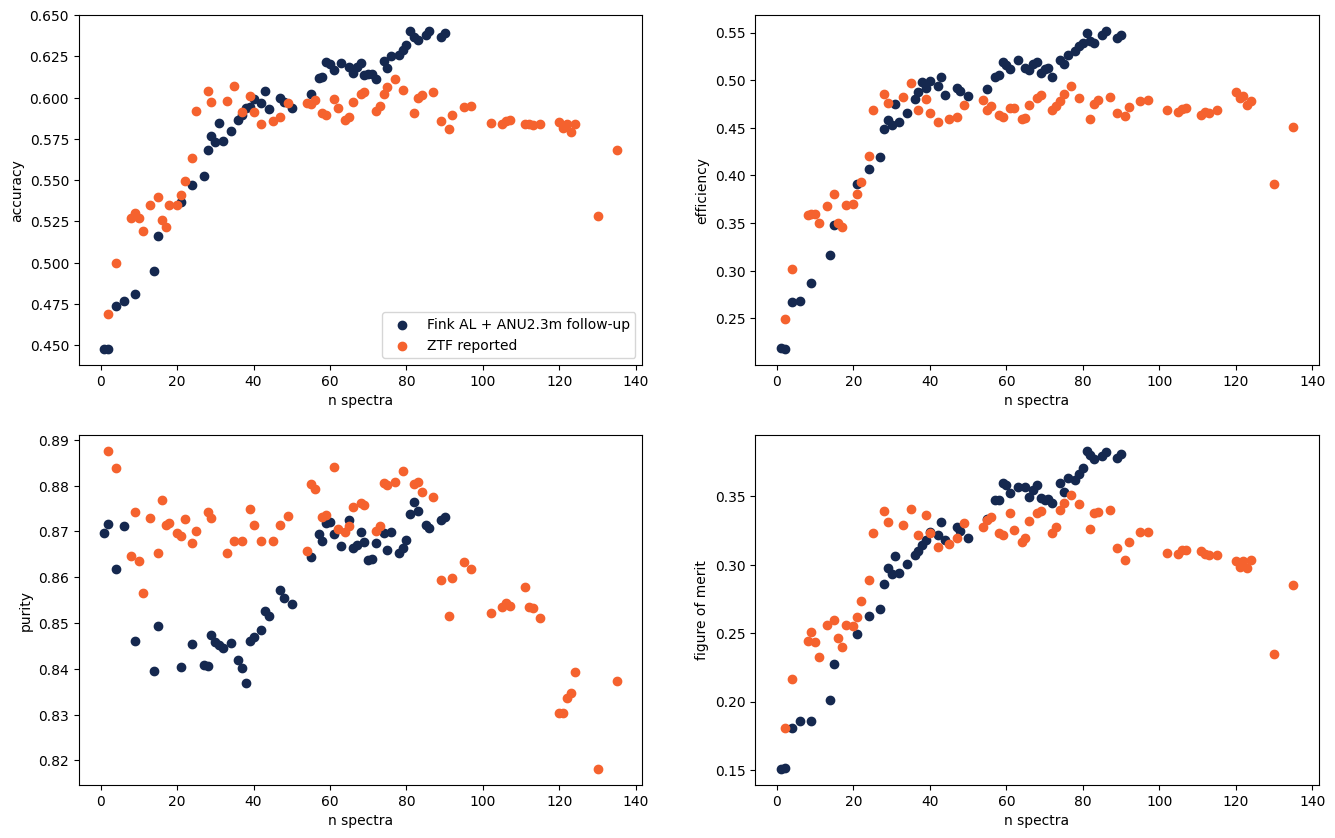

In [13]:
pu.plot_metrics_listdf([metrics_dic['FINK'],metrics_dic['ZTF']],['Fink AL + ANU2.3m follow-up','ZTF reported'],varx='n spectra', plots_dir = '../plots/', suffix='_FINK_ZTF')


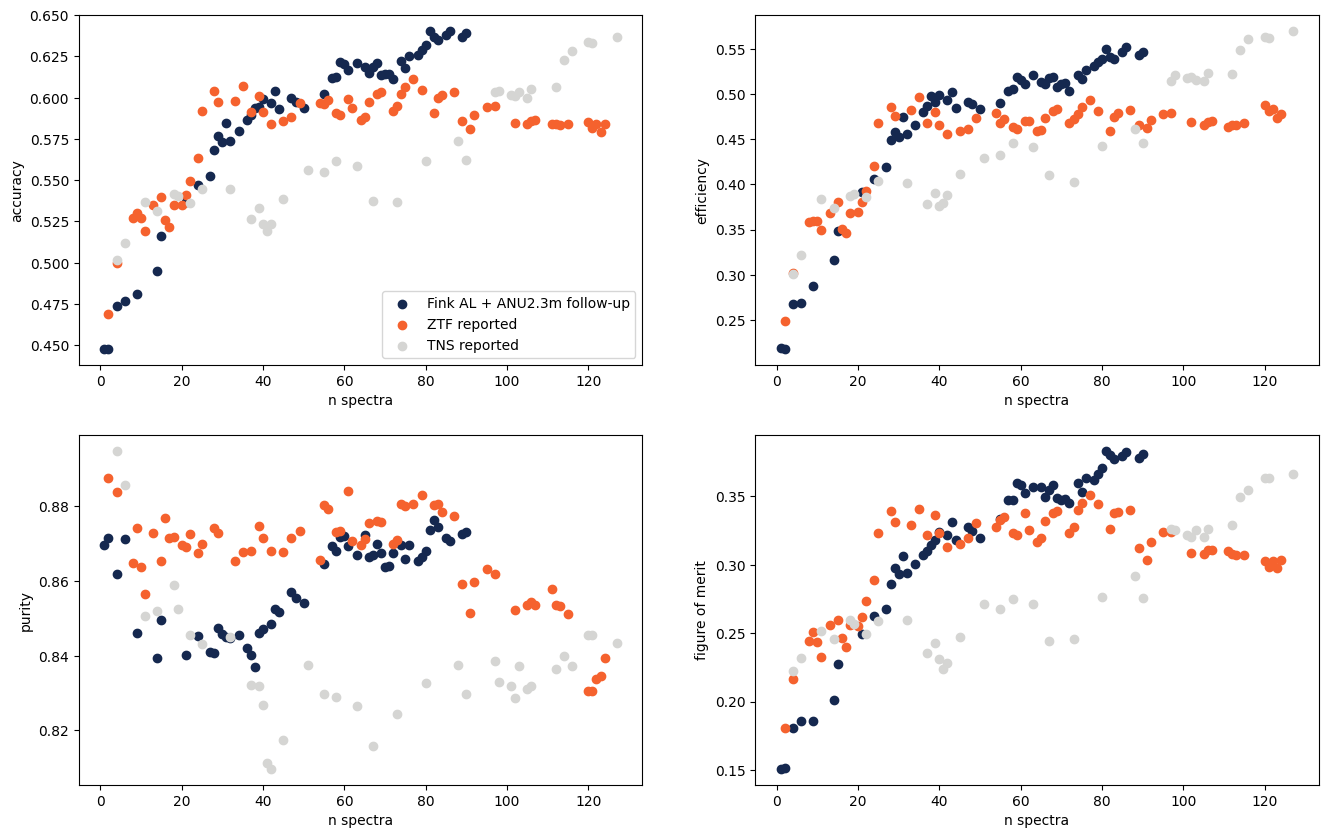

In [20]:
pu.plot_metrics_listdf([metrics_dic['FINK'],metrics_dic['ZTF'][metrics_dic['ZTF']['n spectra']<130],metrics_dic['TNS'][metrics_dic['TNS']['n spectra']<130]],['Fink AL + ANU2.3m follow-up','ZTF reported', 'TNS reported'],varx='n spectra', plots_dir = '../plots/', suffix='_FINK_ZTF_TNS_zoom')


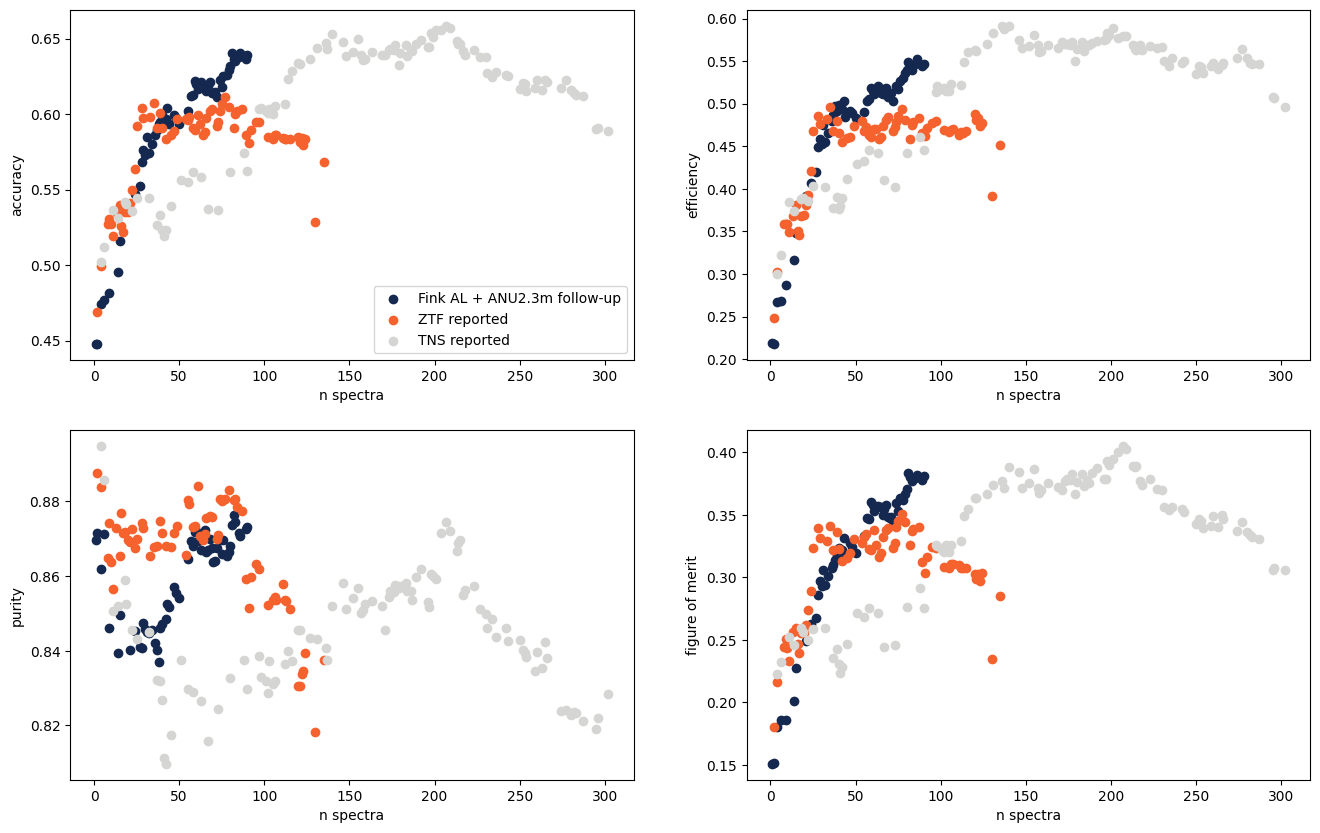

In [22]:
pu.plot_metrics_listdf([metrics_dic['FINK'],metrics_dic['ZTF'],metrics_dic['TNS']],['Fink AL + ANU2.3m follow-up','ZTF reported', 'TNS reported'],varx='n spectra', plots_dir = '../plots/', suffix='_FINK_ZTF_TNS')
